In [1]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from scipy import stats
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_trends = pd.read_excel('/content/World_GT_Full.xlsx')

In [3]:
df_trends['Date'] = pd.to_datetime(df_trends.iloc[:, 0], infer_datetime_format=True)

In [4]:
df_trends = df_trends.set_index(df_trends.iloc[:,0])
df_trends = df_trends.drop(['Date'], axis = 1)
df_trends = df_trends.iloc[1:,:]
df_trends

,swiss franc,Europe,EUR,Switzerland,CHF,NASDAQ,S&P500,VIX,volatility,Germany,UK,sterling pound,GBP,Greece,Italy,Spain,France,DAX,unemployment,recession,euro,crisis,fed,finance,financial crisis,federal reserve,gold,inflation,treasuries,OPEC,contagion,corruption,disaster,futures,forwards,president,parliament,aid,EU,European Union,...,steel,silver,bronze,corn,commodities,natural gas,agriculture,emerging market,trade,interest rate,GDP,exports,imports,jobs,tax,tariff,uncertainty,gini,inequality,insurance,pension,liquidity,diversification,alpha,currency,CAPM,fixed income,commission,SEC,yield,real estate,eurodollar,regulations,deficit,yield curve,LIBOR,2008,bubble,energy,1939
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-01-02,0,58,12,8,2,22,0,19,31,10,76,0,1,15,5,23,32,3,6,0,5,12,16,47,0,12,18,32,0,8,0,6,5,12,8,3,1,23,3,5,...,18,36,20,10,26,27,27,0,38,18,21,33,90,11,21,34,15,0,0,68,46,0,8,51,48,0,0,13,27,41,68,0,33,15,0,23,0,30,43,28
2004-01-03,0,58,2,5,2,16,0,0,0,9,73,0,0,14,5,20,36,1,6,0,5,17,12,31,0,22,17,26,0,2,0,8,15,5,38,3,1,17,3,11,...,24,44,24,9,5,29,28,0,34,2,46,45,69,10,15,17,12,0,0,52,48,0,0,49,48,0,17,8,35,16,66,0,41,22,0,9,0,43,50,60
2004-01-04,19,46,4,12,3,19,22,12,0,10,73,26,1,16,5,31,31,2,7,2,5,17,9,28,0,3,18,18,0,4,0,15,10,10,0,3,1,16,4,12,...,19,38,37,11,13,13,31,14,39,9,49,9,44,12,16,40,20,5,10,46,56,27,0,44,55,0,0,12,33,17,71,0,27,13,0,16,0,61,55,21
2004-01-05,0,39,0,4,0,14,0,30,0,7,23,0,0,14,6,17,15,0,7,0,3,26,10,41,0,0,27,20,0,0,0,0,15,3,0,5,0,10,2,8,...,15,42,39,5,14,30,56,0,40,37,100,14,28,16,21,23,0,14,59,50,19,0,0,55,66,0,0,21,68,30,82,0,34,51,0,0,0,23,52,15
2004-01-06,0,73,5,6,2,35,0,10,30,12,100,0,0,23,6,24,40,2,10,0,6,20,18,87,0,27,19,64,0,3,0,41,8,19,0,5,8,20,5,15,...,29,37,43,21,25,19,42,12,60,19,31,36,41,14,23,59,10,5,17,100,67,15,11,57,74,22,39,26,70,31,54,15,80,47,74,75,0,29,84,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-13,1,20,14,8,15,40,30,16,7,5,37,3,5,12,4,9,12,19,17,3,7,16,18,67,3,8,29,28,3,1,1,23,15,18,3,3,7,17,8,1,...,27,37,38,22,44,28,20,1,37,19,16,28,7,9,19,20,10,8,15,38,58,12,1,35,22,6,5,6,46,43,14,1,15,48,2,3,1,35,65,7
2021-09-14,2,20,14,8,14,42,30,14,6,5,38,3,5,11,3,8,12,18,13,4,7,17,18,67,4,7,29,34,4,2,1,25,17,17,3,2,6,17,8,1,...,26,36,39,22,74,33,21,3,34,21,15,21,8,9,22,19,9,8,15,39,56,13,2,34,24,8,5,7,46,47,15,1,15,50,2,3,1,36,69,6
2021-09-15,2,20,14,8,15,42,31,14,8,5,37,3,5,11,3,8,12,19,12,4,7,17,18,67,4,8,29,36,4,2,1,18,18,17,3,3,7,17,8,1,...,29,37,38,22,62,33,21,2,35,20,19,32,7,9,22,26,13,9,16,42,54,13,1,36,31,9,7,7,46,43,15,1,15,43,1,3,1,36,71,9


#Correlation Matrix

In [5]:
corr_mat = df_trends.corr(method='pearson')

In [7]:
corr_mat

,swiss franc,Europe,EUR,Switzerland,CHF,NASDAQ,S&P500,VIX,volatility,Germany,UK,sterling pound,GBP,Greece,Italy,Spain,France,DAX,unemployment,recession,euro,crisis,fed,finance,financial crisis,federal reserve,gold,inflation,treasuries,OPEC,contagion,corruption,disaster,futures,forwards,president,parliament,aid,EU,European Union,...,steel,silver,bronze,corn,commodities,natural gas,agriculture,emerging market,trade,interest rate,GDP,exports,imports,jobs,tax,tariff,uncertainty,gini,inequality,insurance,pension,liquidity,diversification,alpha,currency,CAPM,fixed income,commission,SEC,yield,real estate,eurodollar,regulations,deficit,yield curve,LIBOR,2008,bubble,energy,1939
swiss franc,1.000000,0.008359,0.157276,0.020252,0.253353,-0.004203,-0.049413,-0.005184,0.061951,0.036754,0.055130,0.024213,0.093738,0.041248,0.008281,0.075218,-0.013082,-0.014113,-0.074261,0.012100,0.027411,0.018254,0.044253,0.047961,0.045112,0.094210,-0.064873,0.076255,0.075727,0.081459,-0.008479,0.013291,0.006471,0.013528,0.063001,0.043630,-0.005552,0.094503,0.028811,0.077532,...,0.135301,0.018769,0.021784,-0.010711,-0.007635,-0.001668,0.115293,0.003326,0.110936,0.087047,0.082398,0.023025,0.038240,0.113331,0.058728,0.066191,0.076799,-0.003349,0.071270,0.064440,0.044213,0.033168,-0.002267,0.199340,0.044175,-0.042944,0.083502,0.019558,0.022464,0.022903,0.003021,-0.014573,0.072335,0.013122,0.121719,0.057277,-0.022071,-0.123104,0.073236,0.192524
Europe,0.008359,1.000000,-0.649391,-0.066730,-0.607789,-0.025848,-0.314563,-0.407781,0.553440,0.375413,0.575448,0.325003,-0.691933,0.423337,0.350338,0.595531,0.754178,-0.369090,-0.195526,-0.046667,-0.067165,0.406676,0.159552,0.212896,-0.103017,0.426243,-0.540146,0.496671,0.168227,0.162387,-0.171888,-0.268870,-0.266020,-0.074488,0.470820,0.149281,0.183974,0.097717,-0.619305,0.734381,...,-0.393150,-0.014784,0.359290,-0.245084,-0.205059,0.559369,0.714513,0.352440,0.533191,0.297365,0.570047,0.392213,0.834486,0.152744,0.223619,0.098616,0.427065,0.054955,-0.029061,0.734635,0.307111,0.309473,0.607157,-0.159831,0.898541,0.380107,0.493556,0.784314,0.112760,-0.337820,0.901288,0.165635,0.856864,-0.052892,0.303878,0.684610,0.189587,0.210014,0.317337,0.217460
EUR,0.157276,-0.649391,1.000000,0.128456,0.758518,0.124645,0.238245,0.354771,-0.314724,-0.212932,-0.389967,-0.074987,0.889826,-0.171372,-0.232410,-0.384918,-0.565470,0.409339,0.041035,0.088201,0.170982,-0.219096,0.118880,0.152404,0.172651,-0.115784,0.321809,-0.171481,-0.023162,-0.002725,0.060178,0.377940,0.298138,0.166708,-0.358066,-0.030237,0.021139,0.173783,0.609433,-0.372573,...,0.508498,-0.103824,-0.240492,0.042313,0.334469,-0.190052,-0.427435,-0.245103,-0.157414,-0.100330,-0.319118,-0.058240,-0.606445,0.223557,0.066470,0.164523,-0.250459,-0.021809,0.247812,-0.327025,0.058047,-0.074513,-0.442752,0.408447,-0.547517,-0.218365,-0.272706,-0.422439,-0.015926,0.532940,-0.693497,-0.058885,-0.517963,0.209432,-0.194020,-0.433477,-0.136107,-0.302151,0.109212,-0.108967
Switzerland,0.020252,-0.066730,0.128456,1.000000,0.121349,0.143769,0.172399,0.149364,0.018521,0.224467,0.042260,-0.014549,0.133957,0.135056,0.126027,0.176688,0.005971,0.149345,0.034116,-0.008141,0.298616,-0.114128,0.065005,0.109022,-0.060838,0.017241,0.112873,0.037987,0.046441,0.003654,0.032902,0.028858,0.111617,0.104600,-0.011753,-0.002662,0.039707,0.107709,0.050335,0.007658,...,0.154188,0.061733,0.057997,0.064909,-0.016377,-0.021109,0.054533,-0.000250,0.025541,0.080879,0.038705,0.061498,-0.052922,0.074392,0.049269,-0.000164,0.029811,0.015288,-0.013443,0.057541,0.196865,-0.038662,-0.053928,0.028431,-0.009969,-0.068517,0.034985,-0.038775,0.156666,0.139944,-0.060796,0.026235,-0.005130,0.171022,0.035174,-0.003590,-0.110420,-0.217011,0.060674,0.074006
CHF,0.253353,-0.607789,0.758518,0.121349,1.000000,0.205194,0.330783,0.454777,-0.332871,-0.275196,-0.402181,-0.128115,0.699154,-0.231868,-0.237677,-0.427820,-0.499501,0.525480,0.193211,0.241332,0.105534,-0.102777,0.075864,0.268812,0.226226,-0.150212,0.425415,-0.207025,-0.063247,-

In [8]:
with open('correlation_matrix.tex', 'w') as tf:
     tf.write(corr_mat.to_latex())

#Heatmap

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


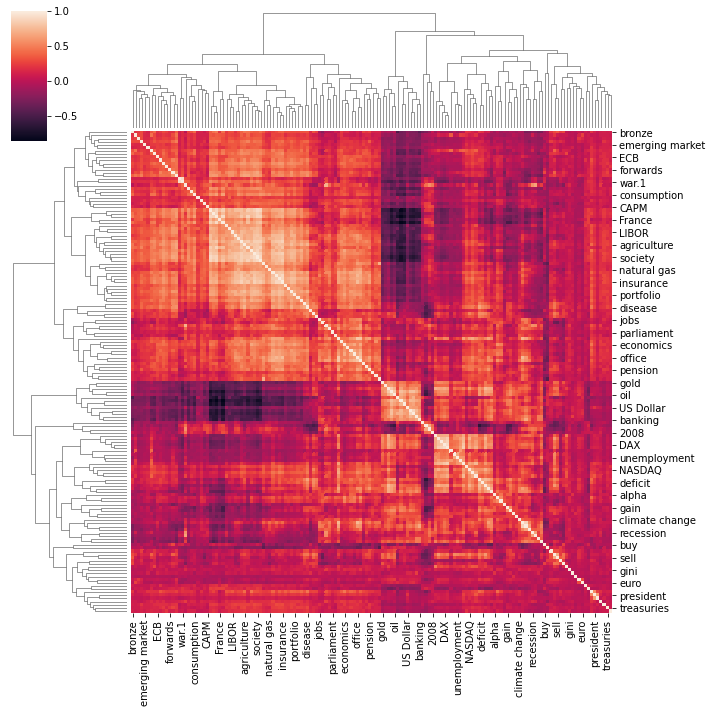

In [6]:
sns.clustermap(corr_mat)